# Email Spam Detection 

### Hrithik Vohra, DTU

In [5]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

In [6]:
# Loading the dataset in dataframe df
df=pd.read_csv('emails.csv')

df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [52]:
df.tail(5)

,text,spam
2735,re : anshuman thanks for the clarification v...,0
2736,final project deadline is april 30 dear ener...,0
2737,re : hello from vince kaminski at enron vinc...,0
2738,re : follow on conversation w / aa amy - - ...,0
2739,re : planning for your energy finance class p...,0


In [7]:
df.shape

(5728, 2)

In [8]:
df.columns 

Index(['text', 'spam'], dtype='object')

In [9]:
# Permanently deleting the redundant data
df.drop_duplicates(inplace=True)


In [10]:
#New shape of dataset
df.shape

(5695, 2)

In [11]:
#divide the dataset into 2 equal i.e. equal spam and equal ham emails
df['spam'].value_counts()


0    4327
1    1368
Name: spam, dtype: int64

In [12]:
# to remove 4327-1368=2959 rows from the end of dataframe
df.drop(df.tail(2959).index, inplace = True)
df['spam'].value_counts()

1    1368
0    1368
Name: spam, dtype: int64

In [13]:

#removing the first word 'subject ' from all the emails as it is useless
df['text']=df['text'].map(lambda text: text[8:])

df.head(5)
# displays now only the starting of an email 

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [14]:
df.isnull().sum() #check if null values

text    0
spam    0
dtype: int64

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HRITHIK
[nltk_data]     VOHRA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

C:\Users\HRITHIK VOHRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

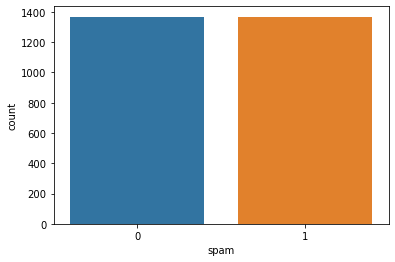

In [16]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
sns.countplot(df['spam'])

In [17]:
# will create function to do data preprocessing and removing numericals,punctuations and the stopwords from the given text
def process_text(text):
    # remove punctuations checking each character
    punc_less=[ch for ch in text if ch not in string.punctuation]
    punc_less=''.join(punc_less)
    
    #remove all numerical values
    res = ''.join([i for i in punc_less if not i.isdigit()])
    
    # remove all stopwords
    new_words=[word for word in res.split() if word.lower() not in stopwords.words('english')]
    
    #apply stemming 
    final_words=[ps.stem(w) for w in new_words]
    
    return final_words


In [18]:
process_text('hello 3344 phone44...'' 112worlds ,hello 345661 on a this is number get offer 12345 programing programs program')

['hello',
 'phone',
 'world',
 'hello',
 'number',
 'get',
 'offer',
 'program',
 'program',
 'program']

In [19]:
# emai=df
# emai['length'] = emai['text'].map(lambda text: len(text))
# emai.groupby('spam').length.describe()
# emai_subset = emai[emai.length < 1800]
# emai_subset.hist(column='length', by='spam', bins=50)

# Splitting the Data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['spam'],test_size=0.30,random_state=18)

In [21]:
y_test.value_counts()

0    421
1    400
Name: spam, dtype: int64

In [22]:
y_test.shape

(821,)

# BoW Model

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
temp_train_bow=CountVectorizer(analyzer=process_text).fit(X_train)

In [24]:
train_bow=temp_train_bow.transform(X_train)

In [25]:
train_bow.shape   #would be further used for TF-IDF

(1915, 16392)

In [26]:
temp_test_bow=CountVectorizer(analyzer=process_text).fit(X_train)

In [27]:
test_bow=temp_test_bow.transform(X_test)

In [28]:
test_bow.shape

(821, 16392)

In [29]:
# Creating and Training of the Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB


In [30]:
#training the model
clf_bow=MultinomialNB().fit(train_bow,y_train)

In [31]:
# Measuring the performance of our model on train data
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
pred_train_bow=clf_bow.predict(train_bow)

print('Confusion Matrix -> \n',confusion_matrix(y_train,pred_train_bow))
print('\nAccuracy-> ',accuracy_score(y_train,pred_train_bow))

Confusion Matrix -> 
 [[944   3]
 [  1 967]]

Accuracy->  0.997911227154047


In [33]:
# Measuring the performance of our model on test data
pred_test_bow=clf_bow.predict(test_bow)
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print('\nAccuracy-> ',accuracy_score(y_test,pred_test_bow))
print('\nPrecision-> ',precision_score(y_test,pred_test_bow))
print('\nf1-Score-> ',f1_score(y_test,pred_test_bow))
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_bow))


Accuracy->  0.9866017052375152

Precision->  0.9874686716791979

f1-Score->  0.986232790988736
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       421
           1       0.99      0.98      0.99       400

    accuracy                           0.99       821
   macro avg       0.99      0.99      0.99       821
weighted avg       0.99      0.99      0.99       821



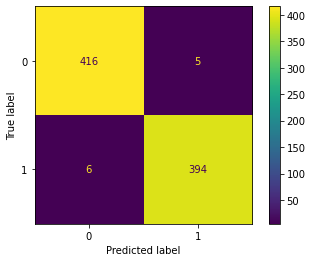

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_bow,test_bow,y_test)

In [35]:

# import matplotlib.pyplot as plt
# from sklearn import metrics
# y_pred_proba = clf_bow.predict(test_bow)
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="auc="+str(auc))
# plt.legend(loc=4)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.show()

In [36]:
pred_test_bow=clf_bow.predict(test_bow)

print('Confusion Matrix -> \n',confusion_matrix(y_test,pred_test_bow))
print('\nAccuracy-> ',accuracy_score(y_test,pred_test_bow))

Confusion Matrix -> 
 [[416   5]
 [  6 394]]

Accuracy->  0.9866017052375152


In [60]:
ex_docs=['hi call me','free money! call','freee money free tax']

abc=temp_test_bow.transform(ex_docs)
ex_pred=clf_bow.predict(abc)
print(ex_pred)

[0 1 1]


In [58]:
abc.shape


(3, 16392)

In [59]:
print(abc)

  (0, 2032)	1
  (0, 6532)	1
  (1, 2032)	1
  (1, 5549)	1
  (1, 9377)	1
  (2, 2032)	1
  (2, 9030)	1
  (2, 15243)	1


In [40]:
temp_test_bow.vocabulary_

{'get': 5845,
 'order': 10276,
 'anyth': 709,
 'sell': 12866,
 'reach': 11806,
 'mass': 8861,
 'direct': 3869,
 'e': 4267,
 'mail': 8662,
 'advertis': 230,
 'bulk': 1909,
 'expert': 4977,
 'us': 15248,
 'volum': 15604,
 'discount': 3903,
 'avail': 1054,
 'info': 7111,
 'place': 10975,
 'pleas': 11009,
 'leav': 8184,
 'name': 9614,
 'telephon': 14326,
 'number': 10018,
 'best': 1440,
 'time': 14574,
 'call': 2032,
 'click': 2614,
 'remov': 12040,
 'eprm': 4717,
 'articl': 867,
 'hi': 6532,
 'vinc': 15523,
 'sorri': 13463,
 'around': 847,
 'sydney': 14137,
 'week': 15790,
 'miss': 9278,
 'good': 5997,
 'book': 1676,
 'launch': 8115,
 'parti': 10577,
 'john': 7626,
 'martin': 8841,
 'organis': 10292,
 'paul': 10641,
 'made': 8631,
 'short': 13098,
 'speech': 13540,
 'relay': 12008,
 'great': 6077,
 'comment': 2780,
 'said': 12548,
 'came': 2053,
 'thank': 14425,
 'much': 9508,
 'find': 5302,
 'attach': 966,
 'next': 9822,
 'realli': 11827,
 'tide': 14556,
 'fulli': 5646,
 'end': 4588,
 'y

# TF-IDF Model

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
train_tfidf=TfidfTransformer().fit_transform(train_bow)

In [43]:
train_tfidf.shape

(1915, 16392)

In [44]:
test_tfidf=TfidfTransformer().fit_transform(test_bow)

In [45]:
test_tfidf.shape

(821, 16392)

In [46]:
print(test_tfidf)

  (0, 15348)	0.12520776585371032
  (0, 15260)	0.08640146460803416
  (0, 14044)	0.1245822326611348
  (0, 6628)	0.23179535431548068
  (0, 5872)	0.5430529811181767
  (0, 5549)	0.0989946487108544
  (0, 5302)	0.1049808507602507
  (0, 4930)	0.23487758288464122
  (0, 3683)	0.46975516576928245
  (0, 2561)	0.3226946988046072
  (0, 2122)	0.4396841808723736
  (0, 798)	0.13634178101632155
  (1, 16136)	0.19856663516606665
  (1, 15990)	0.07809343538948363
  (1, 15781)	0.3554683806352605
  (1, 15737)	0.06598995884775109
  (1, 15560)	0.14169061342631736
  (1, 15364)	0.14535959291086512
  (1, 15114)	0.11312883071165239
  (1, 14629)	0.06850475091051506
  (1, 14295)	0.09332912875162808
  (1, 14044)	0.08182789424575031
  (1, 13924)	0.08842433101326488
  (1, 13524)	0.15618687077896726
  (1, 13230)	0.06659220088360587
  :	:
  (819, 755)	0.08454533374914606
  (819, 67)	0.12217636486223606
  (820, 15523)	0.2321797573322111
  (820, 15260)	0.05782343027895832
  (820, 14574)	0.048522766783741185
  (820, 14425)	0

In [47]:
clf_tfidf=MultinomialNB().fit(train_tfidf,y_train)

In [48]:
pred_train_tfidf=clf_tfidf.predict(train_tfidf)

print('Confusion Matrix -> \n',confusion_matrix(y_train,pred_train_tfidf))
print('\nAccuracy-> ',accuracy_score(y_train,pred_train_tfidf))

Confusion Matrix -> 
 [[942   5]
 [  1 967]]

Accuracy->  0.9968668407310705


In [49]:
pred_test_tfidf=clf_tfidf.predict(test_tfidf)
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print('\nAccuracy-> ',accuracy_score(y_test,pred_test_tfidf))
print('\nPrecision-> ',precision_score(y_test,pred_test_tfidf))
print('\nf1-Score-> ',f1_score(y_test,pred_test_tfidf))
 
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_tfidf))


Accuracy->  0.9841656516443362

Precision->  0.9874055415617129

f1-Score->  0.9836888331242158
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       421
           1       0.99      0.98      0.98       400

    accuracy                           0.98       821
   macro avg       0.98      0.98      0.98       821
weighted avg       0.98      0.98      0.98       821



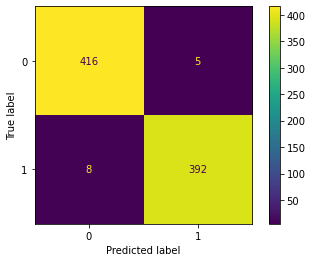

In [50]:
plot_confusion_matrix(clf_tfidf,test_tfidf,y_test)

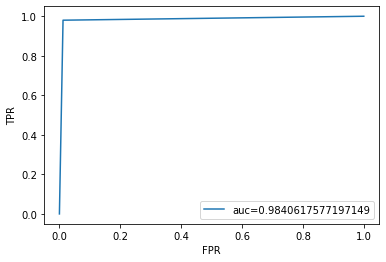

In [51]:
import matplotlib.pyplot as plt
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,pred_test_tfidf)
auc = metrics.roc_auc_score(y_test,pred_test_tfidf)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()